In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
monkey1 = h5py.File('fits/pvc11/monkey1.h5', 'r')
monkey2 = h5py.File('fits/pvc11/monkey2.h5', 'r')
monkey3 = h5py.File('fits/pvc11/monkey3.h5', 'r')
monkeys = [monkey1, monkey2, monkey3]

In [16]:
monkey_idx = 2

In [17]:
lasso = monkeys[monkey_idx]['LassoCV']
uoi_r2 = monkeys[monkey_idx]['UoI_Lasso_R2']
uoi_aic = monkeys[monkey_idx]['UoI_Lasso_AIC']
uoi_bic = monkeys[monkey_idx]['UoI_Lasso_BIC']
uois = [uoi_r2, uoi_aic, uoi_bic]

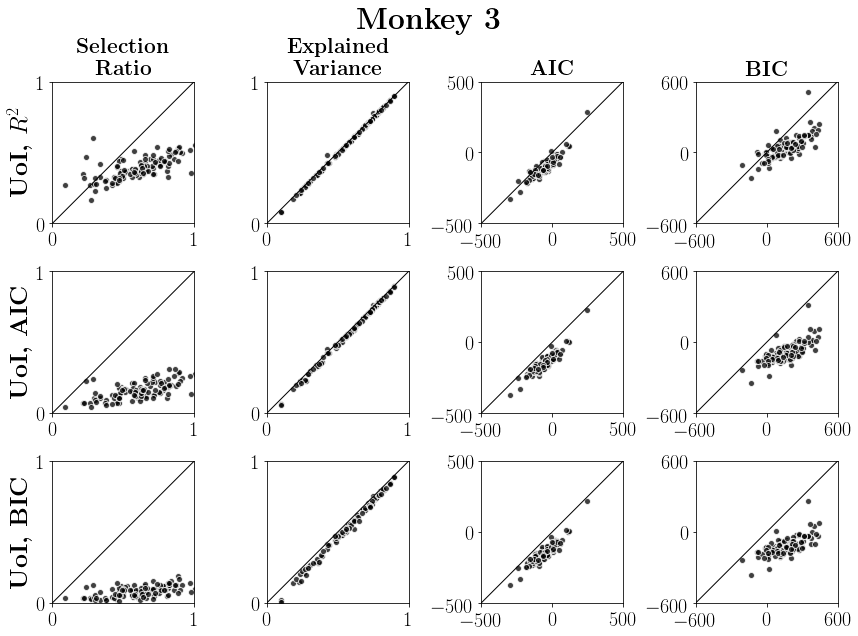

In [18]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for ii, algorithm in enumerate(uois):
    
    # selection ratios
    axes[ii, 0].scatter(
        np.mean(np.count_nonzero(lasso['coupling_coefs'][:], axis=2), axis=0)/105,
        np.mean(np.count_nonzero(algorithm['coupling_coefs'][:], axis=2), axis=0)/105,
        alpha=0.75,
        color='k',
        edgecolor='w'
    )
    axes[ii, 0].plot([0, 1], [0, 1], linewidth=1, color='k')
    
    axes[ii, 0].set_xlim([0, 1])
    axes[ii, 0].set_xticks([0, 1])
    
    axes[ii, 0].set_ylim([0, 1])
    axes[ii, 0].set_yticks([0, 1])
    
    axes[ii, 0].set_aspect('equal')

    # explained variance
    axes[ii, 1].scatter(
        np.mean(lasso['r2'][:], axis=0),
        np.mean(algorithm['r2'][:], axis=0),
        alpha=0.75,
        color='k',
        edgecolor='w'
    )
    axes[ii, 1].plot([0, 1], [0, 1], linewidth=1, color='k')
    
    axes[ii, 1].set_xlim([0, 1])
    axes[ii, 1].set_xticks([0, 1])
    
    axes[ii, 1].set_ylim([0, 1])
    axes[ii, 1].set_yticks([0, 1])
    
    axes[ii, 1].set_aspect('equal')

    # AIC
    axes[ii, 2].scatter(
        np.mean(lasso['AIC'][:], axis=0),
        np.mean(algorithm['AIC'][:], axis=0),
        alpha=0.75,
        color='k',
        edgecolor='w'
    )
    axes[ii, 2].plot([-500, 500], [-500, 500], linewidth=1, color='k')
    
    axes[ii, 2].set_xlim([-500, 500])
    axes[ii, 2].set_xticks([-500, 0, 500])
    
    axes[ii, 2].set_ylim([-500, 500])
    axes[ii, 2].set_yticks([-500, 0, 500])
    
    axes[ii, 2].set_aspect('equal')
    
    # BIC
    axes[ii, 3].scatter(
        np.mean(lasso['BIC'][:], axis=0),
        np.mean(algorithm['BIC'][:], axis=0),
        alpha=0.75,
        color='k',
        edgecolor='w'
    )
    axes[ii, 3].plot([-600, 600], [-600, 600], linewidth=1, color='k')
    
    axes[ii, 3].set_xlim([-600, 600])
    axes[ii, 3].set_xticks([-600, 0, 600])
    
    axes[ii, 3].set_ylim([-600, 600])
    axes[ii, 3].set_yticks([-600, 0, 600])
    
    axes[ii, 3].set_aspect('equal')

# titles and labels
axes[0, 0].set_ylabel(r'\textbf{UoI, $R^2$}')
axes[1, 0].set_ylabel(r'\textbf{UoI, AIC}')
axes[2, 0].set_ylabel(r'\textbf{UoI, BIC}')

axes[0, 0].set_title(r'\textbf{Selection}' '\n' r'\textbf{Ratio}', fontsize=21)
axes[0, 1].set_title(r'\textbf{Explained}' '\n' r'\textbf{Variance}', fontsize=21)
axes[0, 2].set_title(r'\textbf{AIC}', fontsize=21)
axes[0, 3].set_title(r'\textbf{BIC}', fontsize=21)

plt.suptitle(r'\textbf{Monkey 3}', fontsize=30)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('monkey3_results.pdf')